In [1]:
import json
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = 'ultimate_data_challenge.json'
with open(filename) as data_file:
    data = pd.DataFrame(json.load(data_file))
    
logins_filename = 'logins.json'
with open(logins_filename) as data_file:
    logins = pd.DataFrame(json.load(data_file))

In [3]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [5]:
data.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [6]:
logins.isnull().sum()

login_time    0
dtype: int64

In [7]:
len(data)

50000

In [8]:
avg_by_driver = np.mean(data['avg_rating_by_driver'])
avg_by_driver

4.778158195947439

In [9]:
data['avg_rating_by_driver']= data['avg_rating_by_driver'].fillna(int(avg_by_driver))
print(data.isnull().sum())

avg_dist                     0
avg_rating_by_driver         0
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64


In [10]:
avg_of_driver = np.mean(data['avg_rating_by_driver'])
avg_of_driver

4.77502999999973

In [11]:
data['avg_rating_of_driver']= data['avg_rating_of_driver'].fillna(int(avg_of_driver))
print(data.isnull().sum())

avg_dist                    0
avg_rating_by_driver        0
avg_rating_of_driver        0
avg_surge                   0
city                        0
last_trip_date              0
phone                     396
signup_date                 0
surge_pct                   0
trips_in_first_30_days      0
ultimate_black_user         0
weekday_pct                 0
dtype: int64


In [12]:
data['phone'] = data['phone'].fillna('Other')
print(data.isnull().sum())

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
city                      0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
ultimate_black_user       0
weekday_pct               0
dtype: int64


In [13]:
sorted_cities = data['city'].sort_values()
sorted_cities.head()

49999    Astapor
13706    Astapor
13705    Astapor
33004    Astapor
33009    Astapor
Name: city, dtype: object

In [14]:
cities_counted = sorted_cities.value_counts()
cities_counted = cities_counted.rename_axis("city").reset_index(name = "count")

<BarContainer object of 3 artists>

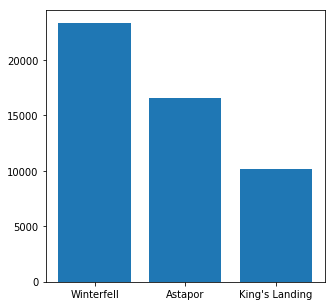

In [15]:
x = list(cities_counted['city'])
y = list(cities_counted['count'])

plt.figure(figsize = (5,5))
plt.bar(x,y)

In [25]:
logins_filename = 'logins.json'
with open(logins_filename) as data_file:
    logins = pd.DataFrame(json.load(data_file))

In [26]:
logins['login_time'] = pd.to_datetime(logins['login_time'])
logins.index = logins['login_time']
logins['count'] = 1

In [27]:
logins_15 = pd.DataFrame(logins['count'].resample('15Min').sum())

In [28]:
logins_15.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


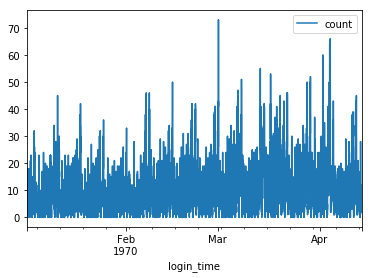

In [29]:
logins_15.plot(kind = "line")

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
        A key measure of success of this experienment is the increase of numbers used during the day or night. If both cities get more traffic during the day and the night, then you'd be able to tell if the vheicles have started using the toll bridge.

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    a. how you will implement the experiment
        The experiment I'd probably look into is through some statistical methods such frequentist inference which would allow me to find the frequency in which cars are used in both cities during the day and the night.
    b. what statistical test(s) you will conduct to verify the significance of the observation
        I'd use A/B testing to verify the singificance. This is so I can compare before and affer to see if there was any significant change in how much each city is being used before and after they implement the toll compensation.
    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
        If there is a difference, then I think it would also be fair to see if the total amount of use increases as well. If it doesn't, then toll price isn't a factor in how much people use the service. But if there is some siginificant difference then it would be wise to keep the toll compensation in place. One thing though is I think that the amount people travel from one city to another will be better tellers of whether or not it was significant. That way before and after you can see if people were more willing to travel between cities and see that people are partnerned between.

In [31]:
corr_pear = data.corr(method = 'pearson')
corr_pear

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
avg_dist,1.000000,0.078858,-0.021684,-0.081491,-0.104414,-0.136329,0.032310,0.101652
avg_rating_by_driver,0.078858,1.000000,0.093025,0.007577,0.017430,-0.035686,0.012265,0.021690
avg_rating_of_driver,-0.021684,0.093025,1.000000,-0.022649,-0.000631,0.061225,0.011616,0.019856
avg_surge,-0.081491,0.007577,-0.022649,1.000000,0.793582,-0.001841,-0.078791,-0.110071
surge_pct,-0.104414,0.017430,-0.000631,0.793582,1.000000,0.005720,-0.106861,-0.144918
trips_in_first_30_days,-0.136329,-0.035686,0.061225,-0.001841,0.005720,1.000000,0.112210,0.050388
ultimate_black_user,0.032310,0.012265,0.011616,-0.078791,-0.106861,0.112210,1.000000,0.035998
weekday_pct,0.101652,0.021690,0.019856,-0.110071,-0.144918,0.050388,0.035998,1.000000


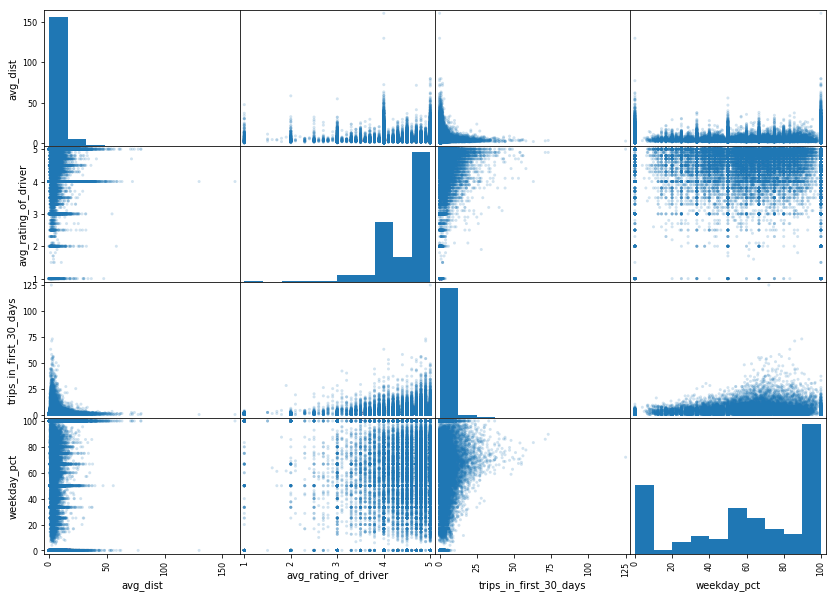

In [37]:
pd.plotting.scatter_matrix(data[['avg_dist','avg_rating_of_driver','trips_in_first_30_days', 'weekday_pct']], alpha=0.2, figsize = (14,10));


In [38]:
#Linear Regression b/c it can predict the outcome given the already set trends and characteristic of the data

In [40]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [43]:
m = ols('avg_dist~weekday_pct', data).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:               avg_dist   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     522.0
Date:                Thu, 09 Apr 2020   Prob (F-statistic):          5.95e-115
Time:                        14:42:46   Log-Likelihood:            -1.5777e+05
No. Observations:               50000   AIC:                         3.156e+05
Df Residuals:                   49998   BIC:                         3.156e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.8436      0.049     99.173      

In [44]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [63]:
X = data.drop(['trips_in_first_30_days', 'city', 'phone', 'signup_date', 'last_trip_date'], axis = 1)

In [64]:
lm.fit(X, data.trips_in_first_30_days)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [65]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 2.046752038550095


In [67]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 7


In [68]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,avg_dist,-0.093785
1,avg_rating_by_driver,-0.279730
2,avg_rating_of_driver,0.364323
3,avg_surge,-0.281253
4,surge_pct,0.004950
5,ultimate_black_user,0.905779
6,weekday_pct,0.006350


In [69]:
# first five predicted use
lm.predict(X)[0:5]

array([2.98223815, 1.73131203, 2.49624694, 3.32279394, 2.23252502])

Text(0.5, 0, 'Predicted prices')

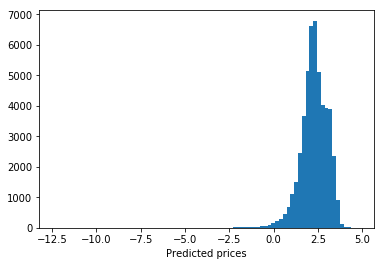

In [71]:
plt.hist(lm.predict(X), bins = 80)
plt.xlabel("Predicted prices")

In [74]:
p = ols('trips_in_first_30_days ~ avg_dist + avg_rating_of_driver + weekday_pct', data).fit()
print(p.summary)

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x1c2b1f07f0>>


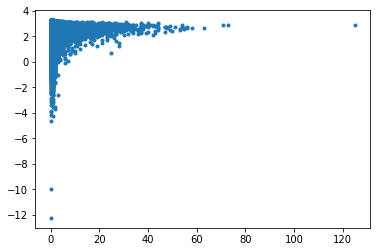

In [75]:
plt.plot(data.trips_in_first_30_days, p.fittedvalues, marker = ".", linestyle = "none")

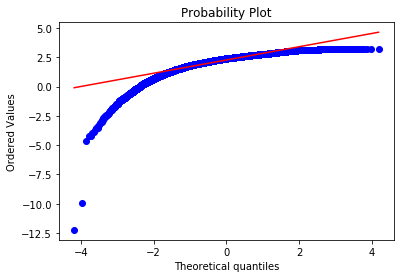

In [78]:
import scipy.stats as stats

_ = stats.probplot(p.fittedvalues, dist="norm", plot=plt)